In [1]:
import pandas as pd

df = pd.read_csv("earlyColorData_YSE.csv", index_col=0)
df.head()

,r-i,g-r,afterExp
0,-0.727116,0.028008,-0.00625
1,-0.734804,0.039352,0.99375
2,-0.691128,0.023258,1.99375
3,-0.555759,-0.029373,2.99375
4,-0.388229,-0.097996,3.99375


In [2]:
#Creating a third column with boolean values for whether observation was within n days
def phasecut(n):
    df["before" + str(n) + "Days"] = [1 if row[1][2] < n else 0 for row in df.iterrows()]

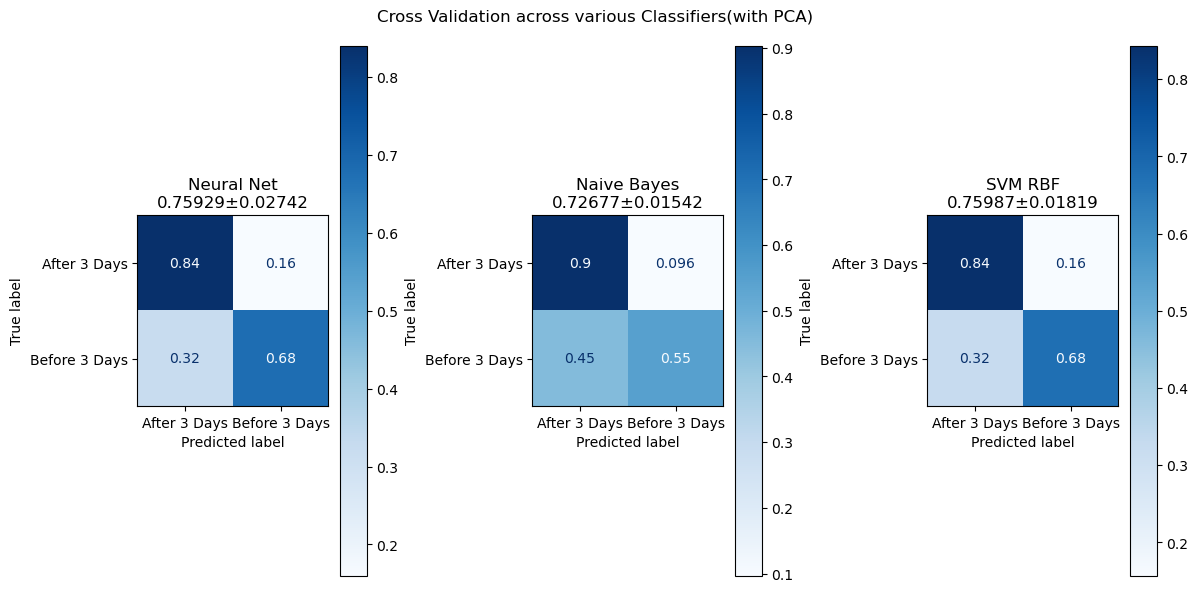

In [3]:
#Main
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

day = 3
phasecut(day)


data = df.to_numpy()
X = data[:, 0:2]
y = data[:, 3]

#apply classifiers
classifiers_name = ["Neural Net", "Naive Bayes", "SVM RBF"]
classifiers = [MLPClassifier(max_iter=1000), GaussianNB(), SVC(C=1)]
label = ["After " + str(day) + " Days", "Before " + str(day) + " Days"]

#Create figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

#Rebalancing
ros = RandomOverSampler(sampling_strategy=1.0)
X_resampled, y_resampled = ros.fit_resample(X, y)

#Stratified means the percentage of samples in each fold is preserved
skf = StratifiedKFold(n_splits=5, shuffle=True)

for i in range(len(classifiers)):
    #initialise matrix
    total_cm = np.array([0, 0, 0, 0])
    total_cm = total_cm.reshape(4, 1)
    total_accuracy = np.array([])
    
    #Cross Validation
    for train_index, test_index in skf.split(X_resampled, y_resampled):
        #PCA
        pca = PCA(n_components=1)
        X_train_reduced = pca.fit_transform(X_resampled[train_index])
        X_test_reduced = pca.fit_transform(X_resampled[test_index])

        classifiers[i].fit(X_train_reduced, y_resampled[train_index])
        y_predict = classifiers[i].predict(X_test_reduced)
        acc = accuracy_score(y_resampled[test_index], y_predict)
        total_accuracy = np.append(total_accuracy, acc)
        
        cm = confusion_matrix(y_resampled[test_index], y_predict, labels=[0,1], normalize="true")
        cm = cm.reshape(4,1)
        
        total_cm = np.concatenate((total_cm, cm), axis=1)
    
    total_cm = np.delete(total_cm,0, axis=1)
    
    mean_accuracy = np.mean(total_accuracy)
    mean_accuracy = round(mean_accuracy, 5)
    mean_array = np.mean(total_cm, axis=1).reshape(2,2)
    std_array = np.std(total_cm, axis=1)
    std = np.mean(std_array)
    std = round(std, 5)
    
    ax[i].set_title(classifiers_name[i] + "\n" + str(mean_accuracy) + "±" + str(std))
    ConfusionMatrixDisplay(mean_array, display_labels=label).plot(ax=ax[i], cmap="Blues")

plt.suptitle("Cross Validation across various Classifiers(with PCA)")
fig.tight_layout()
plt.savefig("Cross Validation across various Classifiers(with PCA).jpg")
plt.show()


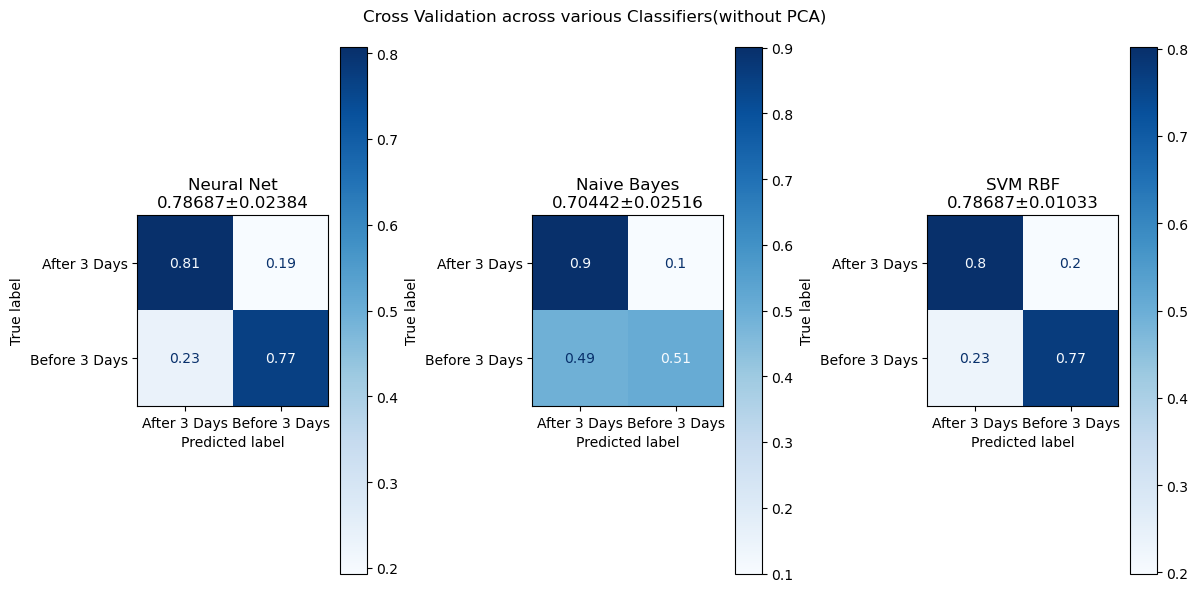

In [4]:
#Main
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

day = 3
phasecut(day)


data = df.to_numpy()
X = data[:, 0:2]
y = data[:, 3]

#apply classifiers
classifiers_name = ["Neural Net", "Naive Bayes", "SVM RBF"]
classifiers = [MLPClassifier(max_iter=1000), GaussianNB(), SVC(C=1)]
label = ["After " + str(day) + " Days", "Before " + str(day) + " Days"]

#Create figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

#Rebalancing
ros = RandomOverSampler(sampling_strategy=1.0)
X_resampled, y_resampled = ros.fit_resample(X, y)

#Stratified means the percentage of samples in each fold is preserved
skf = StratifiedKFold(n_splits=5, shuffle=True)

for i in range(len(classifiers)):
    #initialise matrix
    total_cm = np.array([0, 0, 0, 0])
    total_cm = total_cm.reshape(4, 1)
    total_accuracy = np.array([])
    
    #Cross Validation
    for train_index, test_index in skf.split(X_resampled, y_resampled):
        classifiers[i].fit(X_resampled[train_index], y_resampled[train_index])
        y_predict = classifiers[i].predict(X_resampled[test_index])
        acc = accuracy_score(y_resampled[test_index], y_predict)
        total_accuracy = np.append(total_accuracy, acc)
        
        cm = confusion_matrix(y_resampled[test_index], y_predict, labels=[0,1], normalize="true")
        cm = cm.reshape(4,1)
        
        total_cm = np.concatenate((total_cm, cm), axis=1)
    
    total_cm = np.delete(total_cm,0, axis=1)
    
    mean_accuracy = np.mean(total_accuracy)
    mean_accuracy = round(mean_accuracy, 5)
    mean_array = np.mean(total_cm, axis=1).reshape(2,2)
    std_array = np.std(total_cm, axis=1)
    std = np.mean(std_array)
    std = round(std, 5)
    
    ax[i].set_title(classifiers_name[i] + "\n" + str(mean_accuracy) + "±" + str(std))
    ConfusionMatrixDisplay(mean_array, display_labels=label).plot(ax=ax[i], cmap="Blues")

plt.suptitle("Cross Validation across various Classifiers(without PCA)")
fig.tight_layout()
plt.savefig("Cross Validation across various Classifiers(without PCA).jpg")
plt.show()